In [1]:
import numpy as np
import matplotlib.pyplot as plt

# animation
from matplotlib import animation
from IPython.display import HTML

In [2]:
nx = 81 #nro intervalos
l = 4.0
dx = l /(nx-1)
nt = 40
vMax = 1.0
rhoMax = 10.0
x = np.linspace(0.0, l, nx)

rhoSem = rhoMax/2
dt= 0.001



In [3]:
def rhoSemaforo(x,rhoMax):
  rho = np.zeros(x.size)
  index = np.where(x<2.0)
  rho[index] = rhoMax * x[index]/2.0
  return rho

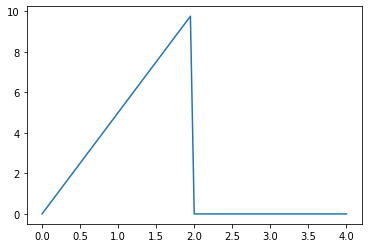

In [4]:
rho = rhoSemaforo(x,rhoMax)

plt.plot(x,rho)

In [5]:
def flujo(rho, vMax, rhoMax):
  v = vMax*(1-rho/rhoMax)
  F= rho*v  
  return F


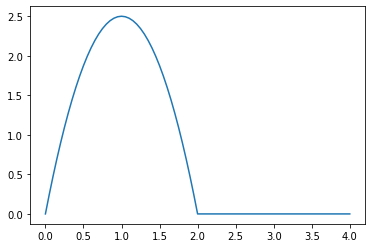

In [6]:


flux = flujo(rho, vMax,rhoMax)
plt.plot(x, flux)

In [7]:
def solver(rho, nt, dt,dx,rSem, *args):
  rhoHist = [rho.copy()]
  rhoCopy = rho.copy()
  for n in range(nt):
    F = flujo(rhoCopy, *args)
    rhoCopy[1:]=rhoCopy[1:] - dt/dx * (F[1:] - F[0:-1])
    rhoCopy[0] = rSem
    rhoHist.append(rhoCopy.copy())
  return rhoHist


In [8]:
dt = dx


In [9]:
Y = solver(rho, nt, dt, dx, rho[0],vMax, rhoMax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


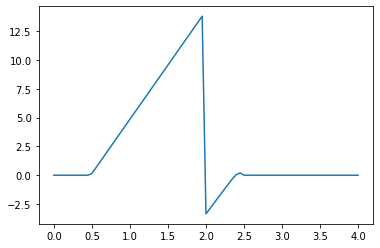

In [10]:
plt.plot(x, Y[10])

In [11]:
def update(n, rhoHist):
  fig.suptitle('step : {:0>2}'.format(n))
  line.set_ydata(rhoHist[n])


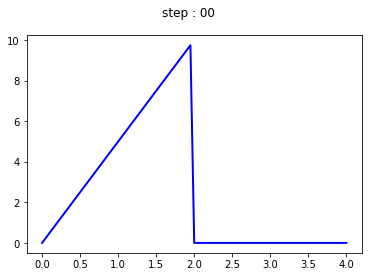

In [12]:
fig = plt.figure(figsize = (6.0 , 4.0))
line = plt.plot(x, rho, color='blue', linestyle='-', linewidth = 2)[0]

newAnimation = animation.FuncAnimation(fig, update, frames=nt, fargs=(Y,), interval=100) # this is a tuple

HTML(newAnimation.to_html5_video())
